In [3]:
from scipy.signal import butter, lfilter
import os, errno
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import glob

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def get_diff(data):
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 100.0
    lowcut = 3.0
    highcut = 49.0

    filtered = butter_bandpass_filter(data, lowcut, highcut, fs, order=5)
    dF = np.diff(filtered.reshape(-1),n = 1)
    detect = dF >=0.1
    return(filtered, dF, detect)

In [3]:
# read all the data the infrared data

path = r'E:\Downloads\ManducaMultiSenseData\IR'
sensor_path = [(os.path.join(root, name), name) for root,_,file in os.walk(path)
                for name in file
                if name.endswith('.mat')]

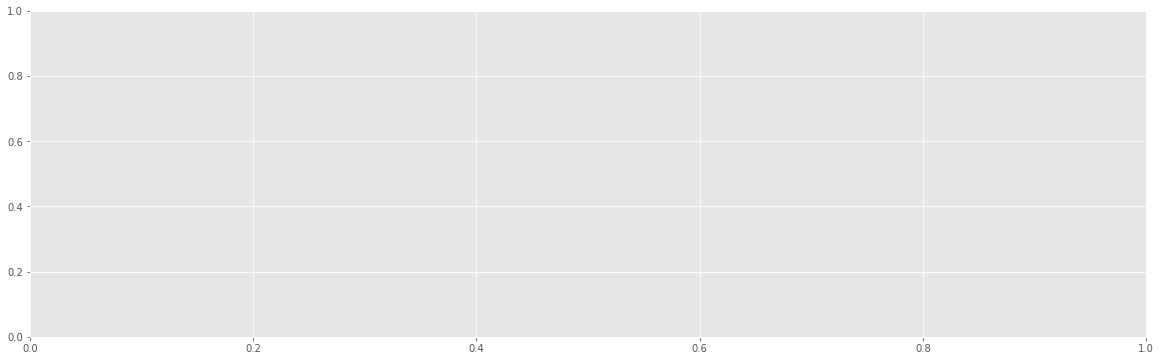

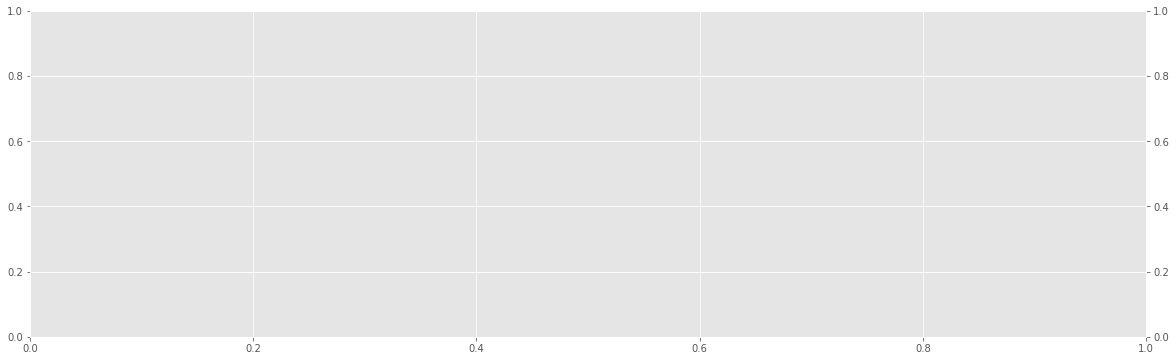

In [4]:
outpath = r'E:\Downloads\ManducaMultiSenseData\Step4'
outpath_fig = r'E:\Downloads\ManducaMultiSenseData\Step4\Figure'

try:
    os.makedirs(outpath_fig)
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

fig1, ax0 = plt.subplots(figsize = (20,6))
fig2, axis0 = plt.subplots(figsize = (20,6))
axis1 = axis0.twinx()

In [5]:
sensor_path

[('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m10.mat',
  'L0.1_c-3_m10.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m12.mat',
  'L0.1_c-3_m12.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m2.mat',
  'L0.1_c-3_m2.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m20.mat',
  'L0.1_c-3_m20.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m21.mat',
  'L0.1_c-3_m21.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m22.mat',
  'L0.1_c-3_m22.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m23.mat',
  'L0.1_c-3_m23.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m24.mat',
  'L0.1_c-3_m24.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m25.mat',
  'L0.1_c-3_m25.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m27.mat',
  'L0.1_c-3_m27.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\L0.1_c-3_m32.mat',
  'L0.1_c-3_m32.mat'),
 ('E:\\Downloads\\ManducaMultiSenseData\\IR\\

In [20]:
for moth in sensor_path:    
    sensor = io.loadmat(moth[0])
    sensor_fname = moth[1]
    IR = sensor['IR']
    print(moth[1])
    
    
    if moth[1].startswith('L0.1_c-3_m46_3'):
       
        cutframe = 1988-1688
        IR = IR[cutframe:]



    filtered, diff, IRdetect = get_diff(IR)
    np.save(outpath + "\\" + sensor_fname + '_IRdetect', arr = IRdetect)

    # get variables for figure
    loadedIRdetect = np.load(outpath + "\\" + sensor_fname + '_IRdetect.npy')
    idx = np.where(loadedIRdetect)
    idx = idx[0].reshape(-1)

    #create filtered dataset and save the figure
    
    ax0.plot(IR, zorder = 1, label = 'raw IR')
    ax0.plot(filtered, 'b', zorder = 5, label = 'filtered IR')
    ax0.legend()
    fig1.savefig(outpath_fig + '\\' + sensor_fname + '_filteredIR.svg')
    ax0.cla()

    # create figure with marked events
    axis0.plot(filtered,c='blue', zorder = 5, label = 'High pass filtered')
    axis0.set_ylabel('IR filtered value (volts)', color ='blue')
    axis0.tick_params('y', color ='blue')

    axis1.plot(diff, c= 'darkred', zorder = 1, label = 'differential', alpha = 0.5)
    axis1.set_ylabel('differentiated trace', color ='darkred')
    axis1.tick_params('y', color ='darkred')

    axis1.plot(idx, diff[IRdetect], 'o', c = 'darkred')
    
    fig2.savefig(outpath_fig + '\\' + sensor_fname + '_diff_eventmarked.svg')
    axis0.cla()
    axis1.cla()

L0.1_c-3_m10.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m12.mat
L0.1_c-3_m2.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m20.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m21.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m22.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m23.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m24.mat
L0.1_c-3_m25.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m27.mat
L0.1_c-3_m32.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m34.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m37.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m38.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m39.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m40.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m41.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m43.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m44.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m47.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m48.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m49.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m5.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m50.mat
L0.1_c-3_m54.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m57.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L0.1_c-3_m8.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m10.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m12.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m13.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m14.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m15.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m2.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m21.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m22.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m24.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m25.mat
L50_c-3_m26.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m30.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m32.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m33.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m34.mat
L50_c-3_m35.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m37.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m38.mat
L50_c-3_m39.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m45.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m49.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m51.mat
L50_c-3_m58.mat
L50_c-3_m6.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


L50_c-3_m9.mat


C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


For videos that are merged

In [6]:
# trouble shoot IR traces for problem visits
IR_list = []
for moth in sensor_path:    
    sensor = io.loadmat(moth[0])
    sensor_fname = moth[1]
    IR = sensor['IR']
    print(moth[1])
    
    print(sensor['IR'])
    
    if moth[1].startswith('L0.1_c-3_m46_3'):
       
        cutframe = 1988-1688
        IR = IR[cutframe:]
    IR_list.append((IR , sensor_fname))
    

L0.1_c-3_m37.mat
[[0.21591797]
 [0.21914062]
 [0.21914062]
 ...
 [0.22236328]
 [0.22236328]
 [0.22236328]]
L0.1_c-3_m38.mat
[[0.52851564]
 [0.52851564]
 [0.525293  ]
 ...
 [0.19013672]
 [0.19013672]
 [0.19013672]]
L0.1_c-3_m8.mat
[[0.41572267]
 [0.41572267]
 [0.41572267]
 ...
 [0.45117188]
 [0.45117188]
 [0.4576172 ]]


In [42]:
names = ['L0.1_c-3_m37','L0.1_c-3_m38', 'L0.1_c-3_m8', 'L0.1_c-3_m8']
prob = [40050,27933, 67219, 75799]

In [45]:
df = pd.DataFrame({"pro": prob, "name":names})
df

,pro,name
0,40050,L0.1_c-3_m37
1,27933,L0.1_c-3_m38
2,67219,L0.1_c-3_m8
3,75799,L0.1_c-3_m8


1 [40050]
1 [27933]
2 [67219 75799]


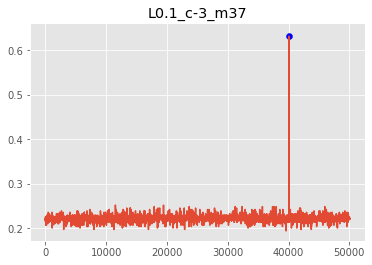

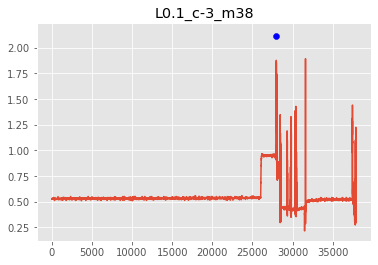

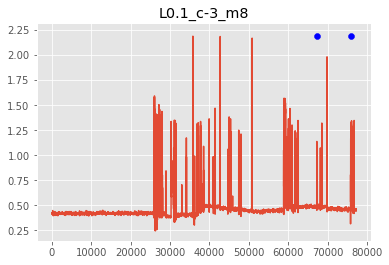

In [62]:
for name in IR_list:
    figure = plt.figure()
    ir = name[0]
    
    val = df[df.name == name[1][:-4]].pro.values
    print(len(val), val)
    plt.plot(ir[0:val[0]+10000])
    plt.scatter(val, len(val)*[max(ir)], c = 'b')
    plt.title(name[1][:-4])
    plt.savefig(path + "//" + name[1][:-4] +".png")

In [114]:
#used for combining sections of videos that have dropped frames
low_45 = np.concatenate((IR_list[0][0], IR_list[1][0]), axis=0)
low_46 = np.concatenate((IR_list[2][0], IR_list[3][0], IR_list[4][0]), axis=0)
high_50 = np.concatenate((IR_list[-2][0], IR_list[-1][0]), axis=0)

In [115]:
filtered, diff, IRdetect = get_diff(low_45)
np.save(outpath + "\\" + 'L0.1_c-3_m45.mat' + '_IRdetect', arr = IRdetect)
filtered, diff, IRdetect = get_diff(low_46)
np.save(outpath + "\\" + 'L0.1_c-3_m46.mat' + '_IRdetect', arr = IRdetect)
filtered, diff, IRdetect = get_diff(low_45)
np.save(outpath + "\\" + 'L50_c-3_m50.mat' + '_IRdetect', arr = IRdetect)

# 

## _tanvi_: redoing data for L50_c-3_m50 - that seems like it got copied wrong above

In [10]:
data_path = r"D:\PaperDrafts_DanielLab\Multisensory - Light levels Paper\DataUploadForDryad\MotionAnalysis_Final\IR/"
sensor_path = glob.glob(data_path + 'L50_c-3_m50*.mat')

In [12]:
sensor_path

['D:\\PaperDrafts_DanielLab\\Multisensory - Light levels Paper\\DataUploadForDryad\\MotionAnalysis_Final\\IR\\L50_c-3_m50.mat',
 'D:\\PaperDrafts_DanielLab\\Multisensory - Light levels Paper\\DataUploadForDryad\\MotionAnalysis_Final\\IR\\L50_c-3_m50_2.mat']

In [32]:
outpath = r"D:\PaperDrafts_DanielLab\Multisensory - Light levels Paper\DataUploadForDryad\MotionAnalysis_Final\Step4/"
IRlist = []
sensor_fname = 'L50_c-3_m50.mat'

for moth in sensor_path:    
    sensor = io.loadmat(moth)
    IR = sensor['IR']
    print(len(IR))
    IRlist.append(IR)

high_50 = np.concatenate((IRlist[0], IRlist[1]), axis=0)
filtered, diff, IRdetect = get_diff(high_50)
np.save(outpath + "\\" + sensor_fname + '_IRdetect', arr = IRdetect)

#am not creating figures for this one

33083
87107


In [33]:
len(high_50), 33083+87107

(120190, 120190)

In [34]:
len(IRdetect)

120189